In [1]:
import pandas as pd
df = pd.read_csv("assets/Cars93.csv")
IsUSA = [];
for origin in df.Origin:
    if(origin == 'non-USA'):
        IsUSA.append(0)
    else:
        IsUSA.append(1)
df["IsUSA"] = IsUSA

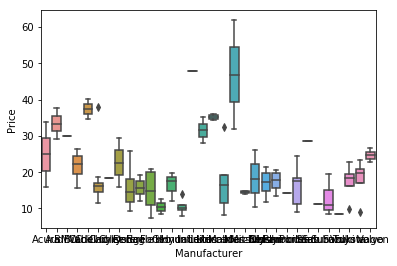

In [5]:
import seaborn as sb
sb.boxplot(df.Manufacturer, df.Price)

In [61]:
X = df[["Min.Price","Price","Max.Price","MPG.city","MPG.highway","EngineSize","Horsepower","RPM","Rev.per.mile","Fuel.tank.capacity","Passengers","Length","Wheelbase","Width","Turn.circle","Weight"]]
Y = df[["IsUSA"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.2)

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

model = lr.fit(xtrain,ytrain)
pred = model.predict(xtest)
pred

/Users/prathameshmadur/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/prathameshmadur/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0])

In [63]:
ytest["prediction"] = pred

/Users/prathameshmadur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,f1_score
print(accuracy_score(ytest.IsUSA,pred))
print(confusion_matrix(ytest.IsUSA,pred))
print(f1_score(ytest.IsUSA,pred))
print(roc_auc_score(ytest.IsUSA,pred))

0.7368421052631579
[[ 4  2]
 [ 3 10]]
0.8
0.717948717948718
